**Health Insurance Predictor** 🏥

---

Author: Farzana S.  
Date: October 2025


---



This project predicts individual health insurance charges using demographic and health data. It demonstrates predictive modeling, feature engineering, and data analysis by applying linear regression with interaction features to understand key factors influencing insurance costs


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

The dataset includes demographic and health info such as age, sex, bmi, children, smoker, region, and their insurance charges.

In [2]:
#uploading the file + load the data
files.upload()
df = pd.read_csv("insurance.csv")
df.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#data cleaning
#changing smoker and gender to have binary values
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

#reflects the correlation between the parameters and insurance charges
df.select_dtypes(include=['number']).corr()["charges"]

,charges
age,0.299008
sex,-0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000


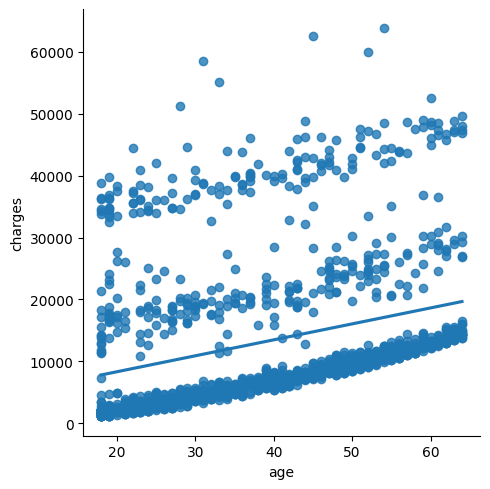

In [4]:
#visually see age vs. insurance charges
sns.lmplot(x="age", y="charges", data=df, fit_reg=True, ci=None)

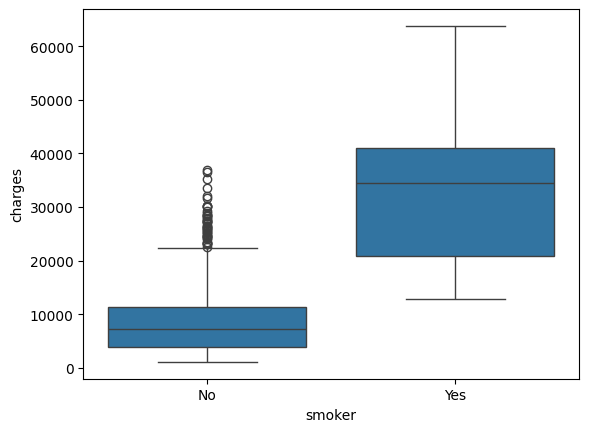

In [129]:
#visually see smoker vs. insurance charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<Axes: ylabel='Frequency'>

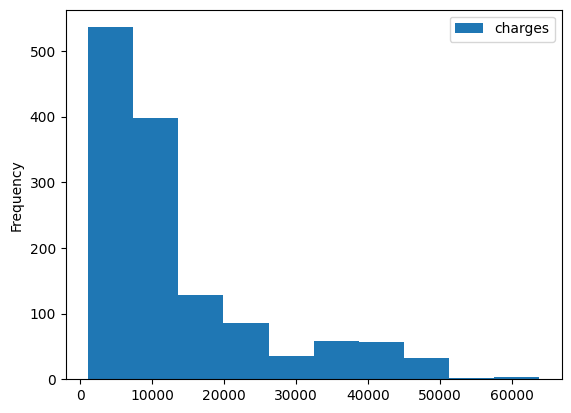

In [130]:
#reflects how balanced the insurance charge column is
df.plot.hist(y="charges")

In [5]:
#showcases if any rows have missing values
df[df.isnull().any(axis=1)]
df = df.dropna() #removes the empty rows

In the next code block, interaction terms such as smoker_bmi and smoker_age are used to capture dependencies between features, making the model more realistic and accurate, especially when some features amplify the effect of others.

In [6]:
#splitting the data
#interaction terms
df['smoker_bmi'] = df['smoker'] * df['bmi']
df['smoker_age'] = df['smoker'] * df['age']

#Predictors
predictors = ['smoker', 'age', 'bmi', 'smoker_bmi', 'smoker_age']
X = df[predictors]
# Target
y = df['charges']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
#create the linear regression model
reg = LinearRegression()
reg.fit(X_train[predictors], y_train)
predictions = reg.predict(X_test[predictors])
X_test["predictions"] = predictions

In [13]:
predictions

array([ 9923.32495692,  7586.43638758, 33537.68382511, 10193.17100563,
       28676.68198318,  7175.66626346,  3019.14589279, 15067.87147643,
        5352.54014331, 11014.06568791, 20672.65975481,  8914.70071819,
        5730.25029663, 51253.13619951, 52964.8737803 , 46540.67076742,
       11142.71179392, 43164.39683338, 10214.36680794, 27834.96594375,
        4619.50918819,  9462.39296659,  3091.6530083 ,  3971.95111051,
       11273.42878016, 12373.7788879 , 13983.65960429,  5208.48957211,
       10465.63779345,  2824.6575881 ,  8638.23385488, 13159.73038198,
        3661.96637326,  5906.209516  ,  4940.2067713 , 10057.85623147,
        3584.07984589,  9437.56491182, 26252.30620966, 38087.1845554 ,
        3075.10097178,  3894.20251678, 12931.67822547, 13630.40968271,
        6845.31332572, 13649.16865742,  3650.56385922,  4623.18741853,
       41113.51516053,  6340.38050499, 14788.50800673,  2817.57699471,
        8749.68423407,  2787.7373511 , 12919.08028657, 11310.11912776,
      

In [14]:
#showcasing the table with predictions and charges to compare side by side
X_test_with_pred = X_test.copy()
X_test_with_pred["predictions"] = predictions
X_test_with_pred["charges"] = y_test
# clean up index
X_test_with_pred = X_test_with_pred.reset_index(drop=True)
print(X_test_with_pred.head())
X_test["predictions"] = X_test["predictions"].round()

   smoker  age     bmi  smoker_bmi  smoker_age   predictions      charges
0       0   45  25.175       0.000           0   9923.324957   9095.06825
1       0   36  30.020       0.000           0   7586.436388   5272.17580
2       1   64  26.885      26.885          64  33537.683825  29330.98315
3       0   46  25.745       0.000           0  10193.171006   9301.89355
4       1   19  31.920      31.920          19  28676.681983  33750.29180


In [16]:
#error shows by how much the predictions may be off by
error = mean_absolute_error(X_test["predictions"], y_test)
print(error)

2858.3931759291045


In [28]:
#percentage form
percentage_error = (error / y_test.mean()) * 100
print(f"Average prediction error: {percentage_error:.2f}%")


Average prediction error: 22.04%


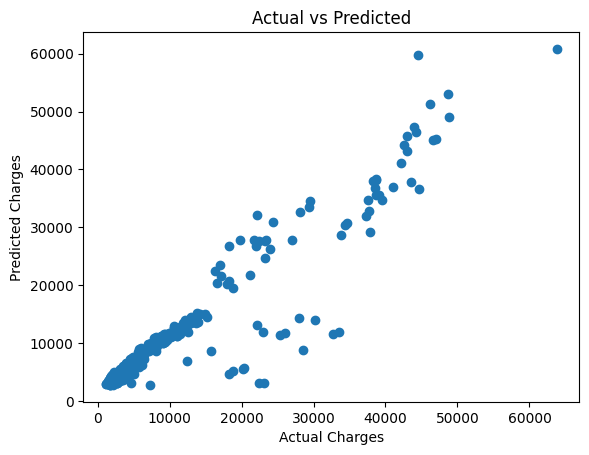

In [18]:
#scatter plot to showcase visually actual charges vs predicted
plt.scatter(y_test, predictions)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.show()


In [19]:
df.describe()["charges"]

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [27]:
#comparing predictions and charges for smokers
X_test_with_pred[X_test_with_pred["smoker"]== 1]

,smoker,age,bmi,smoker_bmi,smoker_age,predictions,charges,error,abs_error,percent_error,age_group
2,1,64,26.885,26.885,64,33537.683825,29330.98315,4206.700675,4206.700675,14.342174,"(50, 70]"
4,1,19,31.920,31.920,19,28676.681983,33750.29180,-5073.609817,5073.609817,15.032788,"(0, 30]"
10,1,30,24.400,24.400,30,20672.659755,18259.21600,2413.443755,2413.443755,13.217675,"(0, 30]"
13,1,46,42.350,42.350,46,51253.136200,46151.12450,5102.011700,5102.011700,11.055011,"(30, 50]"
14,1,60,40.920,40.920,60,52964.873780,48673.55880,4291.314980,4291.314980,8.816522,"(50, 70]"
15,1,47,38.940,38.940,47,46540.670767,44202.65360,2338.017167,2338.017167,5.289314,"(30, 50]"
17,1,47,36.630,36.630,47,43164.396833,42969.85270,194.544133,194.544133,0.452746,"(30, 50]"
19,1,43,26.885,26.885,43,27834.965944,21774.32215,6060.643794,6060.643794,27.833903,"(30, 50]"
38,1,52,24.130,24.130,52,26252.306210,23887.66270,2364.643510,2364.643510,9.899016,"(50, 70]"
39,1,36,35.200,35.200,36,38087.184555,38709.17600,-621.991445,621.991445,1.606832,"(30, 50]"


Next, the scatter plot below shows many points clustered near the lower end of actual charges, while points at higher charges are much more spread out and sparse.

This happens because most people have low-to-moderate insurance charges, so the model has more data to learn from and predicts well there. High charges are rare, so the model sees fewer examples and predictions become less accurate and more scattered.

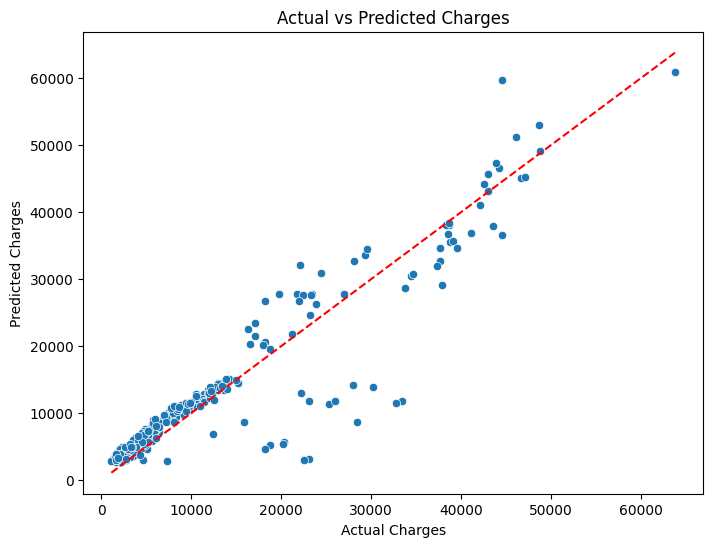

In [21]:
#scattor plot of predictions vs actual insurance charges
plt.figure(figsize=(8,6))
sns.scatterplot(x='charges', y='predictions', data=X_test_with_pred)
plt.plot([X_test_with_pred['charges'].min(), X_test_with_pred['charges'].max()],
         [X_test_with_pred['charges'].min(), X_test_with_pred['charges'].max()],
         color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


As show below, the correlation values between `predictions` and `charges` are high and similar, it shows that the model is doing well. Therefore, as actual charges go up or down, the predicted charges follow the same pattern closely, indicating strong predictive performance.

In [22]:
#check correlation between predictions and health insurance charges
X_test_with_pred.corr()[['predictions','charges']]

,predictions,charges
smoker,0.876721,0.815823
age,0.382647,0.365570
bmi,0.229655,0.204712
smoker_bmi,0.937242,0.868409
smoker_age,0.868768,0.805688
predictions,1.000000,0.927486
charges,0.927486,1.000000


The model’s predictions are less reliable for younger people because their insurance charges are generally lower, so even small absolute errors translate into large percent errors. For older people with higher charges, the same absolute error is a smaller percentage, so predictions are more accurate in relative terms.
As shown below, when grouping the error by age groups and by smoking.

In [29]:
# Add error columns
X_test_with_pred['error'] = X_test_with_pred['predictions'] - X_test_with_pred['charges']
X_test_with_pred['abs_error'] = X_test_with_pred['error'].abs()
X_test_with_pred['percent_error'] = X_test_with_pred['abs_error'] / X_test_with_pred['charges'] * 100


#grouping the errors by age group
X_test_with_pred['age_group'] = pd.cut(X_test_with_pred['age'], bins=[0,30,50,70])
X_test_with_pred.groupby('age_group')[['abs_error','percent_error']].mean()


/tmp/ipython-input-2419443463.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_test_with_pred.groupby('age_group')[['abs_error','percent_error']].mean()


,abs_error,percent_error
age_group,,
"(0, 30]",2873.381921,54.770963
"(30, 50]",2898.844692,26.926805
"(50, 70]",2772.016740,13.934609


In [24]:
#grouping the errors by smoking vs non smoking person
X_test_with_pred.groupby('smoker')[['abs_error','percent_error']].mean()


,abs_error,percent_error
smoker,,
0,2485.772392,38.479122
1,4335.084297,15.282407


In [25]:
# Metrics ----------------------------------------------------------------------

# 1. R-squared
r2 = r2_score(y_test, predictions)
# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
# 4. Average Percent Error
percent_error = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"R-squared (Explained Variance): {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"Average Percent Error: {percent_error:.2f}%")

R-squared (Explained Variance): 0.859
Mean Absolute Error (MAE): $2858.39
Root Mean Squared Error (RMSE): $4681.16
Average Percent Error: 33.81%
